In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# carrega a imagem
img = cv2.imread('capitol.tiff')

# converte a imagem para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# define os parâmetros para a segmentação
mean = np.mean(gray)
stddev = np.std(gray)
lower = mean - stddev
upper = mean + stddev

# aplica a segmentação
segmented = cv2.inRange(gray, lower, upper)

# exibe a imagem segmentada
cv2.imshow('Imagem segmentada', segmented)
cv2.waitKey(0)
cv2.destroyAllWindows()

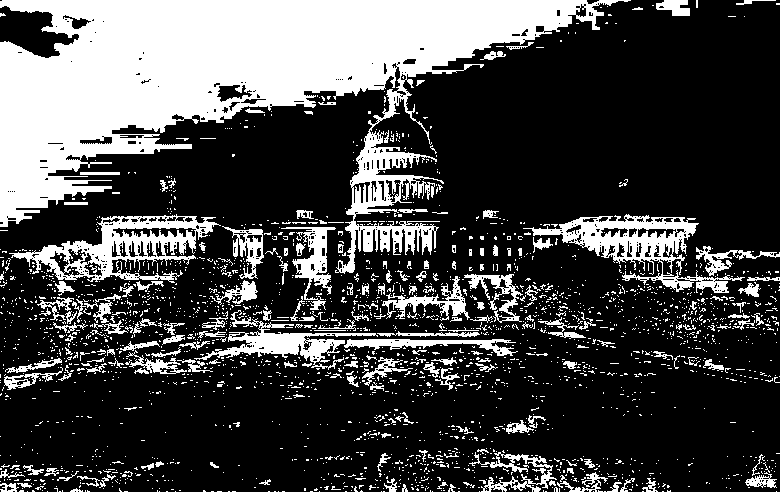

In [1]:
from PIL import Image
import numpy as np

# carrega a imagem
img = Image.open('capitol.tiff')

# converte a imagem para um array numpy
img_array = np.array(img)

# extrai os componentes de cor R, G, B da imagem
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

# calcula a média e o desvio padrão da intensidade dos pixels para cada componente de cor
red_mean, red_stddev = np.mean(red_channel), np.std(red_channel)
green_mean, green_stddev = np.mean(green_channel), np.std(green_channel)
blue_mean, blue_stddev = np.mean(blue_channel), np.std(blue_channel)

# define os limites para cada componente de cor
red_lower, red_upper = red_mean - red_stddev, red_mean + red_stddev
green_lower, green_upper = green_mean - green_stddev, green_mean + green_stddev
blue_lower, blue_upper = blue_mean - blue_stddev, blue_mean + blue_stddev

# aplica a segmentação em cada componente de cor
red_segmented = np.logical_and(red_channel >= red_lower, red_channel <= red_upper)
green_segmented = np.logical_and(green_channel >= green_lower, green_channel <= green_upper)
blue_segmented = np.logical_and(blue_channel >= blue_lower, blue_channel <= blue_upper)

# combina as máscaras binárias para obter a imagem segmentada
segmented = np.logical_and(red_segmented, np.logical_and(green_segmented, blue_segmented)).astype(np.uint8) * 255

# exibe a imagem segmentada
segmented_img = Image.fromarray(segmented)
segmented_img.show()


In [ ]:
from PIL import Image
import numpy as np

# define a função de crescimento de região
def grow_region(image, seed, threshold):
    """
    Cresce uma região na imagem a partir da semente (seed) usando conexão simples.
    Retorna uma máscara binária com os pixels da região segmentada.
    """
    # cria uma matriz de zeros para a máscara binária
    segmented = np.zeros_like(image, dtype=bool)

    # define a lista de pixels da região
    region_pixels = [seed]

    # obtém a intensidade média do pixel da semente
    seed_intensity = image[seed]

    # itera sobre a lista de pixels da região até que todos os pixels sejam adicionados
    while region_pixels:
        # remove o próximo pixel da lista
        pixel = region_pixels.pop()

        # verifica se o pixel já foi adicionado à região
        if segmented[pixel]:
            continue

        # obtém a intensidade do pixel
        intensity = image[pixel]

        # verifica se o pixel satisfaz o critério de conexão simples
        if np.abs(intensity - seed_intensity) <= threshold:
            # adiciona o pixel à região
            segmented[pixel] = True

            # adiciona os pixels vizinhos à lista de pixels da região
            neighbors = get_neighbors(pixel, image.shape[:2])
            region_pixels.extend(neighbors)

    return segmented

# define a função para obter os pixels vizinhos de um pixel
def get_neighbors(pixel, image_shape):
    """
    Retorna uma lista com os pixels vizinhos do pixel fornecido dentro dos limites da imagem.
    """
    neighbors = []
    x, y = pixel

    # verifica os vizinhos acima e abaixo do pixel
    if x > 0:
        neighbors.append((x - 1, y))
    if x < image_shape[0] - 1:
        neighbors.append((x + 1, y))

    # verifica os vizinhos à esquerda e à direita do pixel
    if y > 0:
        neighbors.append((x, y - 1))
    if y < image_shape[1] - 1:
        neighbors.append((x, y + 1))

    return neighbors

# carrega a imagem
img = Image.open('imagem.jpg')

# converte a imagem para um array numpy
img_array = np.array(img)

# extrai os componentes de cor R, G, B da imagem
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

# calcula a média da intensidade dos pixels para cada componente de cor
red_mean, green_mean, blue_mean = np.mean(red_channel), np.mean(green_channel), np.mean(blue_channel)

# define a semente (seed) para a região a partir do pixel central da imagem
seed = (img_array.shape[0] // 2, img_array.shape[1] // 2)

# define o limiar (threshold) de conexão simples para cada componente de cor
red_threshold = np.abs(red_channel[seed] - red_mean)
green_threshold = np.abs(green_channel[seed] - green_mean)
blue_threshold = np.abs(blue_channel[seed] - blue_mean)

# aplica a segmentação em cada componente de cor usando


In [ ]:
from PIL import Image
import numpy as np

# define a função de crescimento de região
def grow_region(image, seed, threshold):
    """
    Cresce uma região na imagem a partir da semente (seed) usando conexão simples.
    Retorna uma máscara binária com os pixels da região segmentada.
    """
    # cria uma matriz de zeros para a máscara binária
    segmented = np.zeros_like(image, dtype=bool)

    # define a lista de pixels da região
    region_pixels = [seed]

    # obtém a intensidade média do pixel da semente
    seed_intensity = image[seed]

    # itera sobre a lista de pixels da região até que todos os pixels sejam adicionados
    while region_pixels:
        # remove o próximo pixel da lista
        pixel = region_pixels.pop()

        # verifica se o pixel já foi adicionado à região
        if segmented[pixel]:
            continue

        # obtém a intensidade do pixel
        intensity = image[pixel]

        # verifica se o pixel satisfaz o critério de conexão simples
        if np.abs(intensity - seed_intensity) <= threshold:
            # adiciona o pixel à região
            segmented[pixel] = True

            # adiciona os pixels vizinhos à lista de pixels da região
            neighbors = get_neighbors(pixel, image.shape[:2])
            region_pixels.extend(neighbors)

    return segmented

# define a função para obter os pixels vizinhos de um pixel
def get_neighbors(pixel, image_shape):
    """
    Retorna uma lista com os pixels vizinhos do pixel fornecido dentro dos limites da imagem.
    """
    neighbors = []
    x, y = pixel

    # verifica os vizinhos acima e abaixo do pixel
    if x > 0:
        neighbors.append((x - 1, y))
    if x < image_shape[0] - 1:
        neighbors.append((x + 1, y))

    # verifica os vizinhos à esquerda e à direita do pixel
    if y > 0:
        neighbors.append((x, y - 1))
    if y < image_shape[1] - 1:
        neighbors.append((x, y + 1))

    return neighbors

# carrega a imagem
img = Image.open('imagem.jpg')

# converte a imagem para um array numpy
img_array = np.array(img)

# extrai os componentes de cor R, G, B da imagem
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

# calcula a média da intensidade dos pixels para cada componente de cor
red_mean, green_mean, blue_mean = np.mean(red_channel), np.mean(green_channel), np.mean(blue_channel)

# define a semente (seed) para a região a partir do pixel central da imagem
seed = (img_array.shape[0] // 2, img_array.shape[1] // 2)

# define o limiar (threshold) de conexão simples para cada componente de cor
red_threshold = np.abs(red_channel[seed] - red_mean)
green_threshold = np.abs(green_channel[seed] - green_mean)
blue_threshold = np.abs(blue_channel[seed] - blue_mean)

# aplica a segmentação em cada componente de cor usando
# os


- aplica a segmentação em cada componente de cor usando a função de crescimento de região
red_segmented = grow_region(red_channel, seed, red_threshold)
green_segmented = grow_region(green_channel, seed, green_threshold)
blue_segmented = grow_region(blue_channel, seed, blue_threshold)

- combina as máscaras binárias dos três componentes de cor
segmented = np.logical_and(red_segmented, np.logical_and(green_segmented, blue_segmented))

- converte a máscara binária de volta para uma imagem RGB
segmented_image = np.zeros_like(img_array)
segmented_image[segmented] = img_array[segmented]

- mostra a imagem segmentada
Image.fromarray(segmented_image).show()